In [1]:
from skimage import filters
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def showImg(img, title="Display"):
    cv2.imshow(title, img)
    while True:
        key = cv2.waitKey(0)
        if key == ord("q") or key == ord("Q"):
            cv2.destroyAllWindows()
            break

In [4]:
img = cv2.imread("tile.jpg")
showImg(img)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImg(imgGray)
clahe = cv2.createCLAHE(clipLimit=1.2, tileGridSize=(12,12))
cl1 = clahe.apply(imgGray)
showImg(cl1)
thresholds = filters.threshold_multiotsu(cl1, classes=2)
regions = np.digitize(cl1, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(imgGray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/shengbin/.local/lib/python3.10/site-packages/cv2/qt/plugins"


QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread (0x2b17350).
Cannot move to target thread (0x2c0d660)

QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread (0x2b17350).
Cannot move to target thread (0x2c0d660)

QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread (0x2b17350).
Cannot move to target thread (0x2c0d660)

QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread (0x2b17350).
Cannot move to target thread (0x2c0d660)

QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread (0x2b17350).
Cannot move to target thread (0x2c0d660)

QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread (0x2b17350).
Cannot move to target thread (0x2c0d660)

QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread (0x2b17350).
Cannot move to target thread (0x2c0d660)

QObject::moveToThread: Current thread (0x2c0d660) is not the object's thread

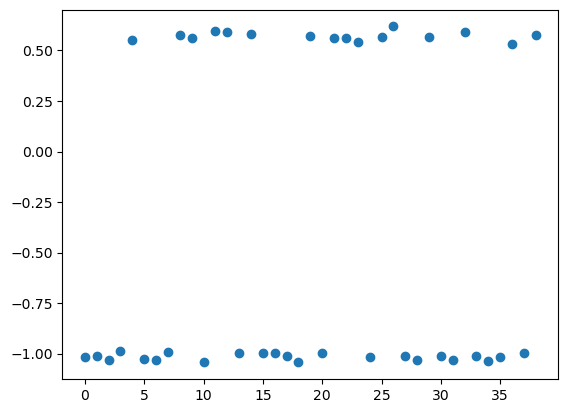

In [10]:
threshold = (cl1 > thresholds[0])
threshold = threshold.astype(np.uint8)*255
showImg(threshold)

dst = cv2.Canny(threshold, 50, 200, None, 3)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
# showImg(lines)

cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

cv2.imshow("Source", imgGray)
cv2.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
cv2.waitKey(0)
cv2.destroyAllWindows()

thetas = []
for line in linesP:
    line = line[0]
    thetas.append(np.arctan2(line[3]-line[1], line[2]-line[0]))

plt.scatter(range(len(thetas)), thetas)